In [48]:
import torch
import pickle
import argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from torchvision import transforms, utils, models

from utils import denormalize, bounding_box

In [49]:
locs = pickle.load(open("./plots/ram_20_50x50_0.75/l_120.p", "rb"))
locs = torch.tensor(locs)

In [50]:
glimpses = pickle.load(open("./plots/ram_20_50x50_0.75/g_120.p", "rb"))
glimpses[0].shape

(3, 128, 256)

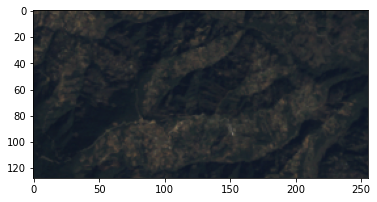

In [51]:
plt.imshow(torch.tensor(glimpses[0]).permute(1,2,0))

In [53]:
def plot(image, dims, coords):
    
    print(image.shape)
    
    coords = coords.numpy()
    num_anims = len(coords)
    num_cols = 1

    size = int(min(dims[0], dims[1]) / 5)
    
    print(size)
    
    for coord in range(len(coords)):
                
        if (coords[coord][0] + size) >= image.shape[1]:
            diff = image.shape[1] - (coords[coord][0] + size)
            coords[coord][0] += diff - 1
                        
        if (coords[coord][1] + size) >= image.shape[2]:
            diff = image.shape[2] - (coords[coord][1] + size)
            coords[coord][1] += diff - 1
            
            
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.imshow(image.permute(1,2,0), cmap="Greys_r")

    def updateData(i):
        color = "r"
        c = coords[i]
        print("C: ", c)
        for p in ax.patches:
            p.remove()
        rect = bounding_box(c[1], c[0], size, color)
        ax.add_patch(rect)  
     
    # animate
    anim = animation.FuncAnimation(
        fig, updateData, frames = num_anims, interval = 500, repeat = True
    )   
    
    # save as mp4
    name = f"./test22.mp4"
    anim.save(name, extra_args=["-vcodec", "h264", "-pix_fmt", "yuv420p"])  
    
    plt.clf()

In [54]:
dims = (glimpses[0].shape[1], glimpses[0].shape[2])
print(dims)
coords = []

for loc in locs:
    coords.append(denormalize(dims, loc))
    
# print(coords)
coords = torch.cat(coords)

(128, 256)


In [55]:
image = transforms.functional.adjust_brightness(torch.tensor(glimpses[0]), brightness_factor = 2)

In [56]:
plot(image, dims, coords)

torch.Size([3, 128, 256])
25
C:  [ 29 155]
C:  [ 29 155]
C:  [ 26 129]
C:  [ 0 73]
C:  [ 0 71]
C:  [  0 102]
C:  [ 15 106]
C:  [ 0 86]
C:  [ 0 40]
C:  [ 12 171]
C:  [  0 123]
C:  [38 87]
C:  [19 49]
C:  [ 60 124]
C:  [ 0 38]
C:  [ 0 40]
C:  [ 29 186]
C:  [  0 104]
C:  [ 11 155]
C:  [  0 183]
C:  [  0 103]


<Figure size 432x288 with 0 Axes>